In [28]:
import os
import pathlib
import pandas as pd

ARTIFACT_DIR = pathlib.Path(f"{os.getcwd()}/../artifacts/")
CSV_DIR = pathlib.Path(f"{os.getcwd()}/../data-raw/csv/")
assert pathlib.Path.exists(CSV_DIR), f"You must extract ZIP files to '{CSV_DIR}'"

In [29]:
econ_df = pd.read_csv(CSV_DIR / "world_economy_freedom.csv")
elec_df = pd.read_csv(CSV_DIR / "global_electricity_production_data.csv")
water_df = pd.read_csv(CSV_DIR / "water.csv")

In [30]:
print(econ_df.info())
econ_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country ID             184 non-null    int64  
 1   Country Name           184 non-null    object 
 2   Region                 184 non-null    object 
 3   World Rank             184 non-null    int64  
 4   Region Rank            184 non-null    int64  
 5   2023 Score             184 non-null    float64
 6   2023 Score Range       184 non-null    object 
 7   Change from 2022       184 non-null    float64
 8   Property Rights        184 non-null    float64
 9   Judical Effectiveness  184 non-null    float64
 10  Govt Integrity         184 non-null    float64
 11  Tax Burden             184 non-null    float64
 12  Gov't Spending         184 non-null    float64
 13  Fiscal Health          184 non-null    float64
 14  Business Freedom       184 non-null    float64
 15  Labor 

,Country ID,World Rank,Region Rank,2023 Score,Change from 2022,Property Rights,Judical Effectiveness,Govt Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,2022 Score
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,92.500000,84.652174,19.190217,57.287880,-0.428424,53.184783,48.277717,44.300000,74.820109,61.335870,52.373370,59.224457,70.097826,67.060326,54.809783,47.065217,57.716304
std,53.260367,53.009626,12.872715,14.885785,5.269549,25.496540,27.834992,22.900829,20.445884,27.942613,33.578268,17.905493,19.320772,17.685705,23.196516,20.673789,16.192481
min,1.000000,0.000000,0.000000,0.000000,-49.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,38.750000,8.000000,51.977500,-1.767500,34.550000,27.925000,27.075000,70.500000,46.900000,19.175000,47.150000,70.200000,61.100000,40.000000,30.000000,52.600000
50%,92.500000,84.500000,18.000000,58.840000,-0.545000,48.700000,44.300000,40.100000,78.350000,69.650000,60.400000,61.900000,75.100000,70.800000,60.000000,50.000000,59.500000
75%,138.250000,130.250000,29.250000,65.967500,0.467500,72.725000,72.400000,59.225000,87.225000,82.250000,82.725000,72.250000,79.950000,78.600000,70.000000,60.000000,67.175000
max,184.000000,176.000000,47.000000,83.970000,39.100000,100.000000,97.800000,100.000000,100.000000,96.800000,99.800000,95.200000,87.100000,95.000000,95.000000,90.000000,84.400000


In [66]:
from scipy import stats
value = 70  # Above the p75
percentile = stats.percentileofscore(econ_df['2023 Score'], value)
print(f"The value {value} is at the {percentile:.2f} percentile.")
econ_df.sample(n=5)

The value 70 is at the 84.78 percentile.


,Country ID,country_name,Region,World Rank,Region Rank,2023 Score,2023 Score Range,Change from 2022,Property Rights,Judical Effectiveness,...,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,2022 Score,2022 Score Range
64,65,Guatemala,Americas,64,13,62.71,60-69.9,-0.49,39.2,28.5,...,94.0,85.8,65.8,50.1,77.4,74.6,70,50,63.2,60-69.9
117,118,Niger,Sub-Saharan Africa,126,23,53.75,50-59.9,-1.15,36.8,37.2,...,84.3,55.9,34.5,54.1,73.2,63.0,55,40,54.9,50-59.9
51,52,Equatorial Guinea,Sub-Saharan Africa,153,37,48.25,40-49.9,1.05,21.6,8.3,...,93.2,96.3,33.5,47.4,77.7,48.7,40,30,47.2,40-49.9
89,90,Latvia,Europe,17,11,72.95,70-79.9,-1.85,87.3,73.0,...,49.0,78.9,78.2,62.6,80.1,78.6,85,60,74.8,70-79.9
47,48,Dominican Republic,Americas,65,14,62.67,60-69.9,-0.33,55.1,56.6,...,89.1,61.9,72.1,53,68.8,67.0,70,40,63.0,60-69.9


In [32]:
print(elec_df.info())
elec_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121074 entries, 0 to 121073
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_name  121074 non-null  object 
 1   date          121074 non-null  object 
 2   parameter     121074 non-null  object 
 3   product       121074 non-null  object 
 4   value         121060 non-null  float64
 5   unit          121074 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.5+ MB
None


,value
count,121060.00000
mean,6925.08149
std,34224.45546
min,0.00000
25%,41.19900
50%,470.41900
75%,2629.71275
max,865976.48280


In [33]:
elec_df.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [34]:
elec_df.parameter.unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports', 'Remarks'], dtype=object)

In [35]:
elec_df["year"] = elec_df["date"].apply(lambda x: int(x.split("/")[-1]))
print(elec_df.year.unique())
elec_df[["country_name", "date", "year"]].head()

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]


,country_name,date,year
0,Australia,12/1/2023,2023
1,Australia,12/1/2023,2023
2,Australia,12/1/2023,2023
3,Australia,12/1/2023,2023
4,Australia,12/1/2023,2023


In [36]:
elec_pivot = elec_df.pivot_table(index=["country_name", "year"], columns=["parameter", "product", "unit"], values="value")
print(elec_pivot.info())
elec_pivot.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 599 entries, ('Argentina', 2015) to ('United States', 2023)
Data columns (total 20 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   (Distribution Losses, Electricity, GWh)                                               503 non-null    float64
 1   (Final Consumption (Calculated), Electricity, GWh)                                    503 non-null    float64
 2   (Net Electricity Production, Coal, Peat and Manufactured Gases, GWh)                  546 non-null    float64
 3   (Net Electricity Production, Combustible Renewables, GWh)                             589 non-null    float64
 4   (Net Electricity Production, Electricity, GWh)                                        599 non-null    float64
 5   (Net Electricity Production, Geothermal, GWh)  

parameter Distribution Losses Final Consumption (Calculated)  \
product           Electricity                    Electricity   
unit                      GWh                            GWh   
count              503.000000                     503.000000   
mean              1508.606746                   22785.641479   
std               3314.695285                   54501.150334   
min                 11.133333                     485.246467   
25%                199.435150                    2726.644012   
50%                394.022417                    6646.982000   
75%               1865.796312                   21406.826683   
max              22396.083417                  339673.128167   

parameter        Net Electricity Production                         \
product   Coal, Peat and Manufactured Gases Combustible Renewables   
unit                                    GWh                    GWh   
count                            546.000000             589.000000   
mean                           13790.755237             791.241920   
std                            52716.865979            1541.025306   
min                                0.000000               0.000000   
25%                              227.346324              52.245775   
50%                              939.508750             243.493667   
75%                             3683.169677             750.993000   
max                           458266.102425           13847.414692   

parameter                                                            \
product      Electricity   Geothermal          Hydro    Natural Gas   
unit                 GWh          GWh            GWh            GWh   
count         599.000000   358.000000     590.000000     578.000000   
mean        32533.092901   153.703885    5254.079322    6280.219502   
std         89635.703433   304.524361   13979.009541   17979.274316   
min            67.206917     0.000000       0.000000       0.000000   
25%          2428.394042     0.000000     228.619462     160.734571   
50%          6366.537000     0.047750    1126.116196    1009.495542   
75%         23655.029946   192.921667    3619.365965    5528.762677   
max        757764.777183  1355.298275  109045.378767  147815.881950   

parameter                                                         \
product   Not Specified       Nuclear Oil and Petroleum Products   
unit                GWh           GWh                        GWh   
count        427.000000    404.000000                 592.000000   
mean          92.995939   6131.685594                 537.434070   
std          298.253620  13371.649205                1385.579331   
min            0.000000      0.000000                   0.000000   
25%            0.000000      0.000000                   6.989040   
50%            8.417000   1281.039333                  56.872633   
75%           39.133250   4682.124958                 446.155327   
max         1794.497250  67450.771850               16168.227833   

parameter                                                                  \
product   Other Combustible Non-Renewables Other Renewables         Solar   
unit                                   GWh              GWh           GWh   
count                           516.000000       240.000000    575.000000   
mean                            131.574278         4.353433    981.926792   
std                             270.556191        12.312977   3333.298212   
min                               0.000000         0.000000      0.000000   
25%                               3.382837         0.000000      8.012496   
50%                              22.242963         0.000000     72.666583   
75%                             115.540998         0.104250    586.088179   
max                            1785.962642        50.600642  43614.411625   

parameter                          \
product   Total Combustible Fuels   
unit                          GWh   
count                  599.000000 

In [37]:
elec_pivot.head(50)

parameter         Distribution Losses Final Consumption (Calculated)  \
product                   Electricity                    Electricity   
unit                              GWh                            GWh   
country_name year                                                      
Argentina    2015                 NaN                            NaN   
             2016                 NaN                            NaN   
             2017                 NaN                            NaN   
             2018                 NaN                            NaN   
             2019                 NaN                            NaN   
             2020                 NaN                            NaN   
             2021                 NaN                            NaN   
             2022                 NaN                            NaN   
             2023                 NaN                            NaN   
Australia    2010         1365.052417                   18340.919083   
             2011         1280.342667                   18620.986417   
             2012         1155.622667                   18534.616667   
             2013         1021.559083                   18241.603500   
             2014         1007.862917                   18829.511583   
             2015          779.203350                   19291.114017   
             2016         1050.873400                   19398.299975   
             2017          843.064850                   19567.816192   
             2018          840.759517                   19772.651725   
             2019          804.558850                   20130.286742   
             2020          809.928642                   20138.458700   
             2021          931.690233                   20308.905942   
             2022          956.716417                   20833.698017   
             2023          954.563242                   20777.963383   
Austria      2010          279.241583                    5172.649333   
             2011          289.171250                    5177.690750   
             2012          294.019417                    5246.008417   
             2013          295.097583                    5295.559333   
             2014          284.156167                    5213.118083   
             2015          288.916250                    5298.663750   
             2016          278.250075                    5377.273592   
             2017          288.252825                    5464.155767   
             2018          277.998825                    5488.354667   
             2019          275.378258                    5505.018342   
             2020          265.985242                    5315.254333   
             2021          269.692083                    5575.653833   
             2022          270.998175                    5333.717325   
             2023          258.646933                    4934.172583   
Belgium      2010          356.916750                    7163.999917   
             2011          346.166667                    6951.083250   
             2012          344.250000                    6988.916667   
             2013          333.916667                    7013.499750   
             2014          315.408000                    6840.641583   
             2015          317.966583                    6925.141750   
             2016          327.258325                    6931.975000   
             2017          324.608333                    6980.516658   
             2018          318.949992                    7018.566658   
             2019          302.658342                    6940.941667   
             2020          291.466667                    6741.458333   
             2021          300.516667                    6992.700008   
             2022          282.820542                    6593.947533   

parameter                Net Electricity Production                         \
product           Coal, Peat and 

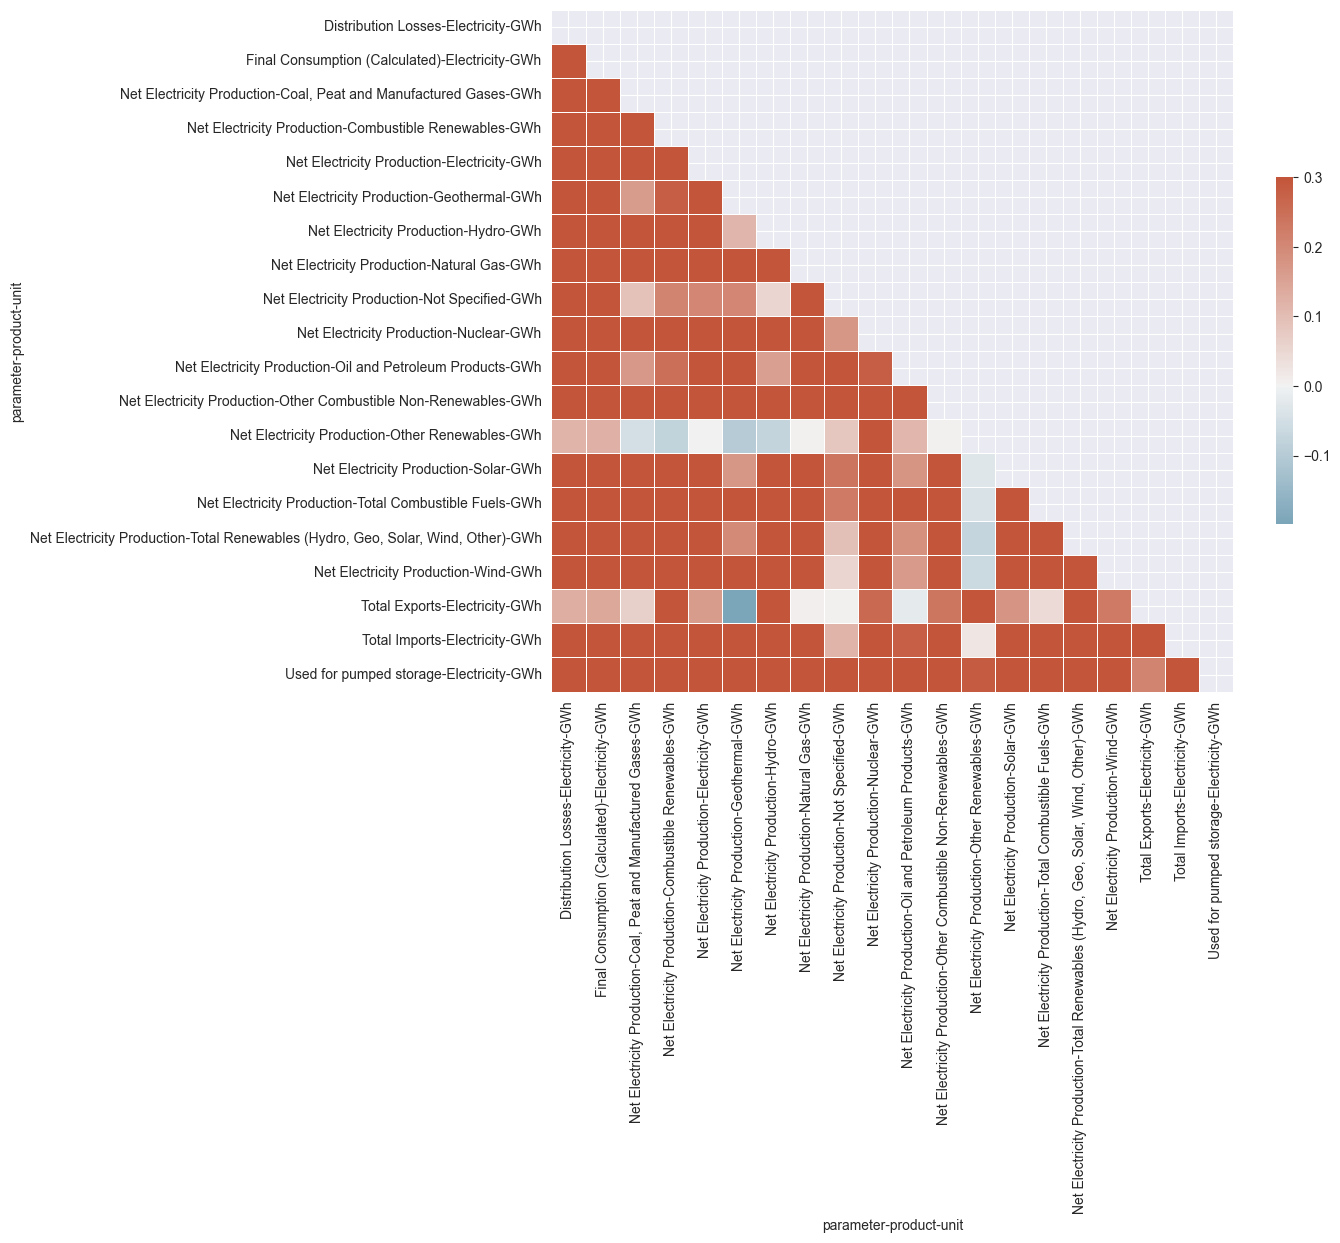

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract just the features and make a corr matrix.
corr = elec_pivot.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(ARTIFACT_DIR / "elec_corr.png")
plt.show()

In [39]:
print(water_df.info())
water_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36519 entries, 0 to 36518
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   DATAFLOW                                                                        36519 non-null  object 
 1   REF_AREA:Geographic area                                                        36519 non-null  object 
 2   INDICATOR:Indicator                                                             36519 non-null  object 
 3   SEX:Sex                                                                         36519 non-null  object 
 4   TIME_PERIOD:Time period                                                         36519 non-null  int64  
 5   OBS_VALUE:Observation Value                                                     36519 non-null  float64
 6   UNIT_MULTIPLIE

,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided
count,36519.000000,36519.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2016.848243,39.625292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.091017,38.467088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2012.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014.000000,2.294425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,26.165874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,80.827447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
water_df.head(10)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2012,30.777313,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2013,28.224066,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2014,25.679155,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2015,23.142490,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2016,20.614330,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
5,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2017,18.093344,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
6,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2018,15.580115,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
7,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2019,13.075619,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
8,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2020,10.580750,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
9,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2021,8.096186,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total


In [41]:
water_pivot = water_df.pivot_table(index=['REF_AREA:Geographic area', 'TIME_PERIOD:Time period'], 
                          columns='INDICATOR:Indicator', 
                          values='OBS_VALUE:Observation Value').reset_index()
print(water_pivot.info())
water_pivot.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 19 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   REF_AREA:Geographic area                                                                                                              3012 non-null   object 
 1   TIME_PERIOD:Time period                                                                                                               3012 non-null   int64  
 2   WS_HCF_W-B: Proportion of health care facilities with basic water services                                                            832 non-null    float64
 3   WS_HCF_W-L: Proportion of health care facilities with limited water servi

INDICATOR:Indicator,TIME_PERIOD:Time period,WS_HCF_W-B: Proportion of health care facilities with basic water services,WS_HCF_W-L: Proportion of health care facilities with limited water services,WS_HCF_W-N: Proportion of health care facilities with no water service,WS_PPL_H-N: Proportion of population with no handwashing facility at home,WS_PPL_W-AVA: Proportion of population using improved drinking water sources available when needed,WS_PPL_W-B: Proportion of population using basic drinking water services,WS_PPL_W-I: Proportion of population using improved drinking water sources,WS_PPL_W-L: Proportion of population using limited drinking water services,WS_PPL_W-NP: Proportion of population using non-piped improved drinking water sources,WS_PPL_W-P: Proportion of population using piped drinking water sources,WS_PPL_W-PRE: Proportion of population using improved drinking water sources located on premises,WS_PPL_W-QUA: Proportion of population using of improved drinking water sources free from faecal and priority chemical contamination,WS_PPL_W-SM: Proportion of population using safely managed drinking water services,WS_PPL_W-SW: Proportion of population using surface water,WS_PPL_W-UI: Proportion of population using unimproved drinking water sources,WS_SCH_W-L: Proportion of schools with limited drinking water services,WS_SCH_W-N: Proportion of schools with no drinking water service
count,3012.000000,832.000000,801.000000,1204.000000,1413.000000,2073.000000,2056.000000,2966.000000,2966.000000,2895.000000,2900.000000,2966.000000,2056.000000,2056.000000,2913.000000,2966.000000,1551.000000,1905.000000
mean,2016.941567,70.434643,18.465409,11.768206,19.620982,73.295268,19.770619,91.870004,4.015809,18.354992,73.362762,75.787110,74.162426,69.656767,2.545216,5.630260,7.282012,17.338028
std,3.146047,20.998008,15.424430,12.531138,20.155583,19.506777,18.569343,11.136104,6.284167,19.841559,27.527317,28.353581,27.193102,29.357812,4.486170,7.727740,10.223550,21.303745
min,2012.000000,19.099701,0.000000,0.000000,0.000000,16.646746,0.000000,41.594315,0.000000,0.000000,1.850000,1.953934,8.243206,5.863130,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,54.614468,2.411400,1.524026,3.100635,57.446516,2.735201,88.871558,0.000000,1.033461,46.683921,58.007855,53.124388,45.336375,0.000000,0.304800,0.000000,0.000000
50%,2017.000000,70.454498,19.355253,8.530062,10.183063,76.425549,16.732810,97.083596,0.922190,10.420700,86.334310,89.913944,84.723552,78.267477,0.221640,2.013912,2.219376,9.518490
75%,2020.000000,88.245819,28.082634,16.538730,33.242292,89.185360,31.724458,99.587157,5.599156,32.344071,97.916355,98.212223,97.967198,96.628765,3.063209,8.152602,12.256020,27.947618
max,2022.000000,100.000000,68.444603,64.394737,99.844879,100.000000,90.822227,100.000000,37.497324,95.369044,100.000000,100.000000,100.000000,100.000000,36.911857,40.623903,67.000000,88.449885


In [42]:
water_indicators = [name.split(": ") for name in water_pivot.columns if name.startswith("WS_") and ":" in name]
for ind in water_indicators:
    print(f"{ind[0]:<12}: {ind[1]}")

WS_HCF_W-B  : Proportion of health care facilities with basic water services
WS_HCF_W-L  : Proportion of health care facilities with limited water services
WS_HCF_W-N  : Proportion of health care facilities with no water service
WS_PPL_H-N  : Proportion of population with no handwashing facility at home
WS_PPL_W-AVA: Proportion of population using improved drinking water sources available when needed
WS_PPL_W-B  : Proportion of population using basic drinking water services
WS_PPL_W-I  : Proportion of population using improved drinking water sources
WS_PPL_W-L  : Proportion of population using limited drinking water services
WS_PPL_W-NP : Proportion of population using non-piped improved drinking water sources
WS_PPL_W-P  : Proportion of population using piped drinking water sources
WS_PPL_W-PRE: Proportion of population using improved drinking water sources located on premises
WS_PPL_W-QUA: Proportion of population using of improved drinking water sources free from faecal and priority

In [43]:
water_pivot.columns = [col.split(':')[0] for col in water_pivot.columns]
water_pivot.TIME_PERIOD = water_pivot.TIME_PERIOD.astype(int)
water_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REF_AREA      3012 non-null   object 
 1   TIME_PERIOD   3012 non-null   int64  
 2   WS_HCF_W-B    832 non-null    float64
 3   WS_HCF_W-L    801 non-null    float64
 4   WS_HCF_W-N    1204 non-null   float64
 5   WS_PPL_H-N    1413 non-null   float64
 6   WS_PPL_W-AVA  2073 non-null   float64
 7   WS_PPL_W-B    2056 non-null   float64
 8   WS_PPL_W-I    2966 non-null   float64
 9   WS_PPL_W-L    2966 non-null   float64
 10  WS_PPL_W-NP   2895 non-null   float64
 11  WS_PPL_W-P    2900 non-null   float64
 12  WS_PPL_W-PRE  2966 non-null   float64
 13  WS_PPL_W-QUA  2056 non-null   float64
 14  WS_PPL_W-SM   2056 non-null   float64
 15  WS_PPL_W-SW   2913 non-null   float64
 16  WS_PPL_W-UI   2966 non-null   float64
 17  WS_SCH_W-L    1551 non-null   float64
 18  WS_SCH_W-N    1905 non-null 

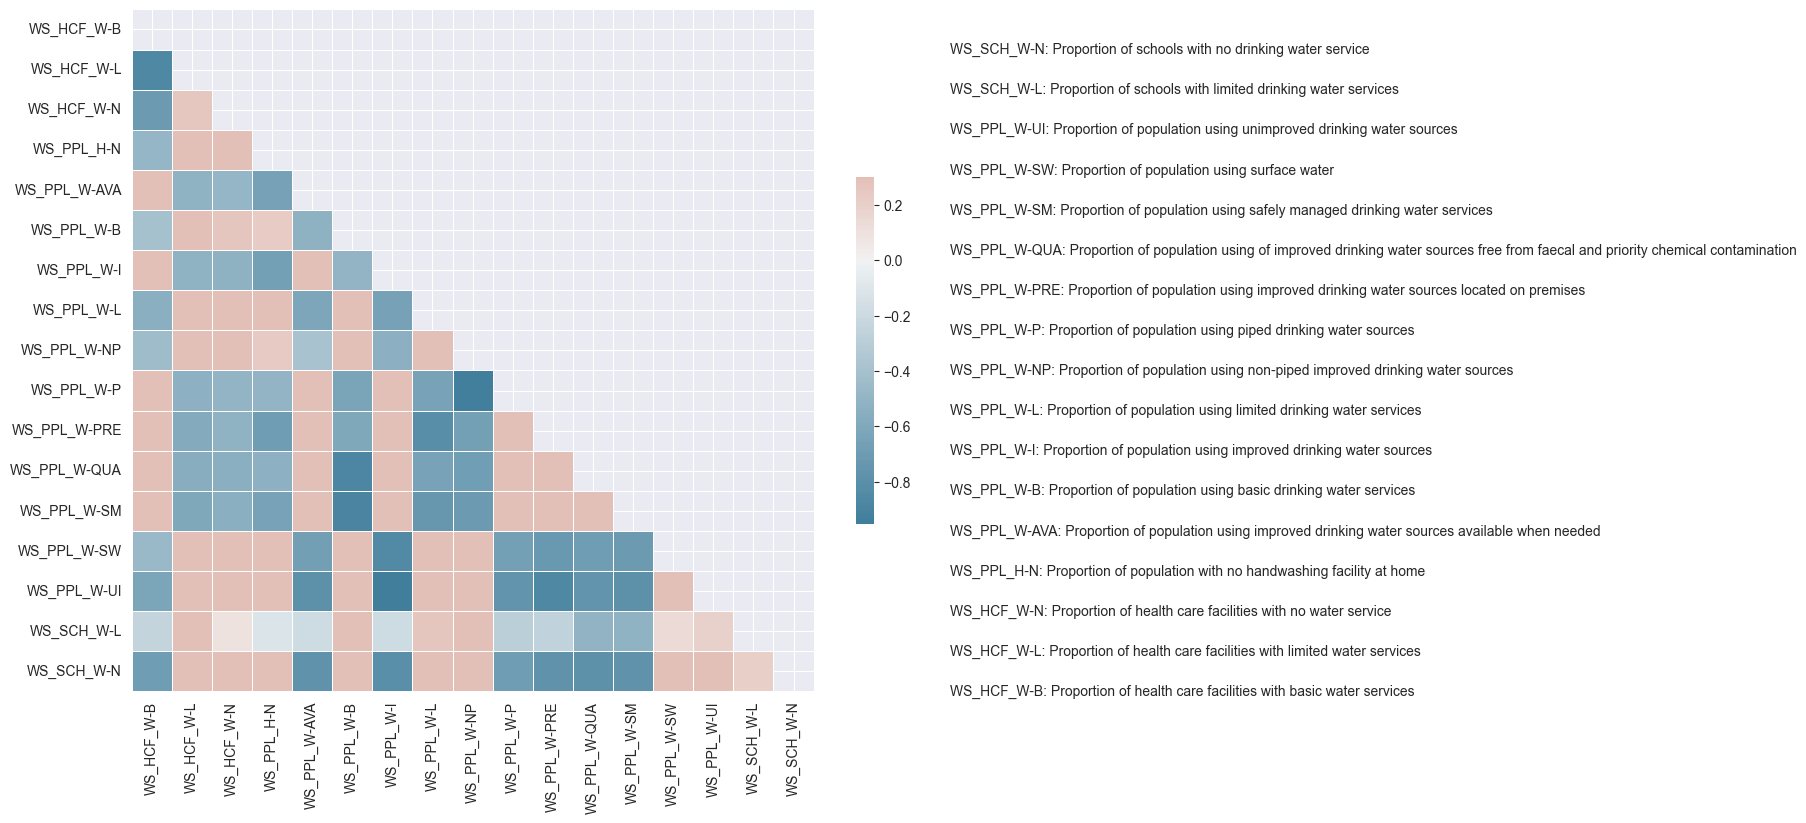

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract just the features and make a corr matrix.
corr = water_pivot[[ind[0] for ind in water_indicators]].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Add the indicators and their definitions to the right side of the heatmap
for i, ind in enumerate(water_indicators):
    ax.text(x=1.2, y=i/len(water_indicators), s=f"{ind[0]}: {ind[1]}", 
            transform=ax.transAxes, verticalalignment='center')

plt.savefig(ARTIFACT_DIR / "water_corr.png")
plt.show()

In [45]:
# Reset the column names and index to get a single level.
# Clone for idempotence.
flat_elec_pivot = elec_pivot.copy(deep=True)
flat_elec_pivot.columns = ['_'.join(col).strip() for col in elec_pivot.columns.values]
flat_elec_pivot.reset_index(inplace=True)
print(flat_elec_pivot.shape)
flat_elec_pivot.head()

(599, 22)


,country_name,year,Distribution Losses_Electricity_GWh,Final Consumption (Calculated)_Electricity_GWh,"Net Electricity Production_Coal, Peat and Manufactured Gases_GWh",Net Electricity Production_Combustible Renewables_GWh,Net Electricity Production_Electricity_GWh,Net Electricity Production_Geothermal_GWh,Net Electricity Production_Hydro_GWh,Net Electricity Production_Natural Gas_GWh,...,Net Electricity Production_Oil and Petroleum Products_GWh,Net Electricity Production_Other Combustible Non-Renewables_GWh,Net Electricity Production_Other Renewables_GWh,Net Electricity Production_Solar_GWh,Net Electricity Production_Total Combustible Fuels_GWh,"Net Electricity Production_Total Renewables (Hydro, Geo, Solar, Wind, Other)_GWh",Net Electricity Production_Wind_GWh,Total Exports_Electricity_GWh,Total Imports_Electricity_GWh,Used for pumped storage_Electricity_GWh
0,Argentina,2015,NaN,NaN,228.981833,93.375750,11465.902667,0.0,2653.628500,6160.141000,...,1725.809083,0.0,0.0,1.242667,8208.307750,2797.297750,49.050833,NaN,NaN,NaN
1,Argentina,2016,NaN,NaN,185.265667,94.939917,11597.680833,0.0,2443.062083,6557.183333,...,1619.060583,0.0,NaN,1.159750,8456.449417,2584.490417,45.328500,NaN,NaN,NaN
2,Argentina,2017,NaN,NaN,191.888636,108.628500,11492.935417,0.0,2613.766833,7149.708500,...,912.093750,0.0,NaN,1.360333,8346.328583,2774.351250,50.595750,NaN,NaN,NaN
3,Argentina,2018,NaN,NaN,178.538983,106.366083,11599.009758,0.0,2655.481458,7457.287942,...,532.638942,0.0,0.0,8.959367,8274.831933,2887.684958,116.878033,NaN,NaN,NaN
4,Argentina,2019,NaN,NaN,98.731817,129.242317,11038.526083,0.0,2269.536042,7128.663733,...,270.001383,0.0,0.0,65.986958,7626.639233,2877.006792,412.241450,NaN,NaN,NaN


In [46]:
water_pivot.rename(columns={"REF_AREA": "country_name", "TIME_PERIOD": "year"}, inplace=True)
water_pivot.country_name = water_pivot.country_name.str.split(":").str[-1].str.strip()
print(water_pivot.shape)
water_pivot.head()

(3012, 19)


,country_name,year,WS_HCF_W-B,WS_HCF_W-L,WS_HCF_W-N,WS_PPL_H-N,WS_PPL_W-AVA,WS_PPL_W-B,WS_PPL_W-I,WS_PPL_W-L,WS_PPL_W-NP,WS_PPL_W-P,WS_PPL_W-PRE,WS_PPL_W-QUA,WS_PPL_W-SM,WS_PPL_W-SW,WS_PPL_W-UI,WS_SCH_W-L,WS_SCH_W-N
0,Aruba,2012,NaN,NaN,NaN,NaN,NaN,NaN,97.869023,0.0,4.076343,93.79268,95.829214,NaN,NaN,0.17104,1.959936,NaN,NaN
1,Aruba,2013,NaN,NaN,NaN,NaN,NaN,NaN,97.869023,0.0,4.076343,93.79268,95.829214,NaN,NaN,0.17104,1.959936,NaN,NaN
2,Aruba,2014,NaN,NaN,NaN,NaN,NaN,NaN,97.869023,0.0,4.076343,93.79268,95.829214,NaN,NaN,0.17104,1.959936,NaN,NaN
3,Aruba,2015,NaN,NaN,NaN,NaN,NaN,NaN,97.869023,0.0,4.076343,93.79268,95.829214,NaN,NaN,0.17104,1.959936,NaN,NaN
4,Aruba,2016,NaN,NaN,NaN,NaN,NaN,NaN,97.869023,0.0,4.076343,93.79268,95.829214,NaN,NaN,0.17104,1.959936,NaN,NaN


In [47]:
econ_df = econ_df.rename(columns={"Country Name": "country_name"})
raw_features = (water_pivot[["country_name", "year", "WS_PPL_W-SM"]]
.merge(
        flat_elec_pivot[["country_name", "year", "Net Electricity Production_Electricity_GWh"]], 
        how="inner", 
        on=["country_name", "year"]
    ))
print(raw_features.shape)
print(raw_features.info())
raw_features

(419, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country_name                                419 non-null    object 
 1   year                                        419 non-null    int64  
 2   WS_PPL_W-SM                                 383 non-null    float64
 3   Net Electricity Production_Electricity_GWh  419 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB
None


,country_name,year,WS_PPL_W-SM,Net Electricity Production_Electricity_GWh
0,Argentina,2015,NaN,11465.902667
1,Argentina,2016,NaN,11597.680833
2,Argentina,2017,NaN,11492.935417
3,Argentina,2018,NaN,11599.009758
4,Argentina,2019,NaN,11038.526083
...,...,...,...,...
414,United States,2018,96.852433,353077.283083
415,United States,2019,97.009330,349631.116417
416,United States,2020,97.164957,337646.728583
417,United States,2021,97.319300,348954.069825


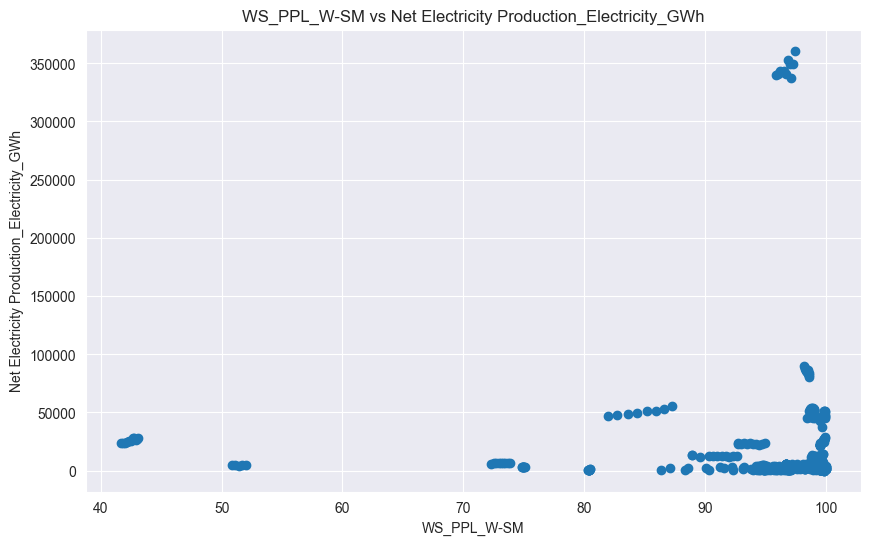

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(raw_features["WS_PPL_W-SM"], raw_features["Net Electricity Production_Electricity_GWh"])
plt.xlabel("WS_PPL_W-SM")
plt.ylabel("Net Electricity Production_Electricity_GWh")
plt.title("WS_PPL_W-SM vs Net Electricity Production_Electricity_GWh")
plt.savefig(ARTIFACT_DIR / "WaterSan-vs-Elec.png")
plt.show()

In [49]:
from collections import defaultdict

import numpy as np
import pandas as pd

MISSING_SENTINEL = np.nan
COUNTRY = 0
YEAR = 1
WATER = 2
ELEC = 3

def calculate_deltas(data: pd.DataFrame) -> dict:
    # Values like { <country_name>: { <year>: [<water_delta>, <elec_delta>] } }
    acc = defaultdict(dict)
    records = data.to_records(index=False)
    
    prev_country_name = ""
    prev_year_water = MISSING_SENTINEL
    prev_year_elec = MISSING_SENTINEL
    
    for record in records:
        acc[record[COUNTRY]][record[YEAR]] = [np.nan, np.nan]
        
        if record[COUNTRY] != prev_country_name:
            prev_country_name = record[COUNTRY]
            prev_year_water = record[WATER]
            prev_year_elec = record[ELEC]
            continue
        
        if prev_year_water != MISSING_SENTINEL and not np.isnan(record[WATER]):
            acc[record[COUNTRY]][record[YEAR]][0] = ((record[WATER] - prev_year_water)/prev_year_water) * 100
        
        if prev_year_elec != MISSING_SENTINEL and not np.isnan(record[ELEC]):
            acc[record[COUNTRY]][record[YEAR]][1] = ((record[ELEC] - prev_year_elec)/prev_year_elec) * 100

        prev_year_water = record[WATER]
        prev_year_elec = record[ELEC]
            
    return acc

deltas = calculate_deltas(raw_features)
print(deltas["Hungary"])

{2012: [nan, nan], 2013: [1.7465640304714238, -13.35445360606263], 2014: [1.7099169497875848, -3.173743457199886], 2015: [1.6746447447705815, 3.7177405505419543], 2016: [1.6410249190069406, 4.966158298997385], 2017: [1.6083135043386079, 3.9934732385785585], 2018: [1.605232619714327, -2.723899700598799], 2019: [1.5457816701848133, 7.5139673898030725], 2020: [1.5158638360941314, 2.4177732756082535], 2021: [0.8985186167678029, 3.7491645006658754], 2022: [1.1465559158105633e-06, -1.2189074066384993]}


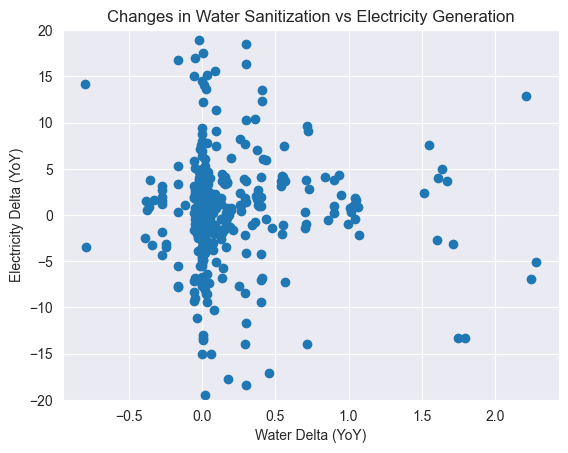

In [50]:
water_deltas = []
elec_deltas = []
for _, years in deltas.items():
    for _, pair in years.items():
        if np.isnan(pair[0]) or np.isnan(pair[1]):
            continue
        water_deltas.append(pair[0])
        elec_deltas.append(pair[1])
plt.scatter(water_deltas, elec_deltas)
plt.ylim(-20, 20)  # Some outliers.
plt.xlabel("Water Delta (YoY)")
plt.ylabel("Electricity Delta (YoY)")
plt.title("Changes in Water Sanitization vs Electricity Generation")
plt.savefig(ARTIFACT_DIR / "Changes-Water-vs-Elec.png")

In [51]:
# FLATTEN - single row per country.
df_pivot = raw_features.pivot_table(index='country_name', columns='year')
# DELTAS to DataFrame.
deltas_df = pd.DataFrame(deltas).T
deltas_df.columns = pd.MultiIndex.from_tuples([(year, 'delta') for year in deltas_df.columns])
# UNPACK DELTAS.
for year in deltas_df.columns.get_level_values(0).unique():
    deltas_df[('delta_WS_PPL_W-SM', year)] = deltas_df[(year, 'delta')].apply(lambda x: x[0] if hasattr(x, '__iter__') else np.nan)
    deltas_df[('delta_Net Electricity Production_Electricity_GWh', year)] = deltas_df[(year, 'delta')].apply(lambda x: x[1] if hasattr(x, '__iter__') else np.nan)
# DROP OLD DELTAS OBJECTS.
deltas_df = deltas_df.drop(columns='delta', level=1)

In [52]:
# MERGE flattened data with deltas information.
feature_df = pd.merge(df_pivot, deltas_df, left_index=True, right_index=True, how='outer')
# SORT and REPLACE missing values.
feature_df = feature_df.sort_index(axis=1).replace({None: np.nan})
# DROP known empty deltas columns.
feature_df = feature_df.drop(columns=[('delta_Net Electricity Production_Electricity_GWh', 2012), ('delta_WS_PPL_W-SM', 2012)])
# RESHAPE FOR EXPORT
feature_df.columns = ['_'.join([str(part) for part in col]).strip() for col in feature_df.columns.values]
feature_df.reset_index(inplace=True)
feature_df.rename(columns={'index': 'country_name'}, inplace=True)
# EXPORT
feature_df.to_csv(ARTIFACT_DIR / "feature_df.csv", index=False, sep="\t", na_rep='NaN')
feature_df.describe()

,Net Electricity Production_Electricity_GWh_2012,Net Electricity Production_Electricity_GWh_2013,Net Electricity Production_Electricity_GWh_2014,Net Electricity Production_Electricity_GWh_2015,Net Electricity Production_Electricity_GWh_2016,Net Electricity Production_Electricity_GWh_2017,Net Electricity Production_Electricity_GWh_2018,Net Electricity Production_Electricity_GWh_2019,Net Electricity Production_Electricity_GWh_2020,Net Electricity Production_Electricity_GWh_2021,...,delta_WS_PPL_W-SM_2013,delta_WS_PPL_W-SM_2014,delta_WS_PPL_W-SM_2015,delta_WS_PPL_W-SM_2016,delta_WS_PPL_W-SM_2017,delta_WS_PPL_W-SM_2018,delta_WS_PPL_W-SM_2019,delta_WS_PPL_W-SM_2020,delta_WS_PPL_W-SM_2021,delta_WS_PPL_W-SM_2022
count,30.000000,30.000000,31.000000,40.000000,40.000000,40.000000,42.000000,42.000000,41.000000,42.000000,...,29.000000,29.000000,30.000000,36.000000,36.000000,36.000000,3.700000e+01,37.000000,37.000000,38.000000
mean,26235.194964,26213.464633,25442.266204,35522.776869,36578.464372,37732.058013,37484.907508,38043.413184,38317.969446,39698.910629,...,0.301708,0.292728,0.271910,0.227468,0.192728,0.177083,1.539123e-01,0.120072,0.093201,0.055357
std,62599.485448,62840.365125,62298.720544,89482.127375,93033.195492,98064.355407,101383.896426,104871.870723,107764.153220,115231.637459,...,0.560857,0.554747,0.536658,0.467689,0.389656,0.385460,3.677135e-01,0.371570,0.309066,0.157510
min,315.573667,238.364000,244.800500,103.415917,67.206917,133.538250,158.888408,156.427250,172.939842,179.447525,...,-0.329024,-0.341323,-0.353617,-0.363128,-0.372400,-0.381747,-3.910098e-01,-0.793471,-0.795599,-0.162834
25%,2499.001500,2442.291375,2414.843750,2320.598708,2452.606117,2498.306452,2454.946981,2423.484227,2322.970908,1847.932975,...,-0.000001,-0.001629,0.000679,-0.000403,-0.000408,-0.004346,-7.857045e-07,-0.000006,-0.000003,0.000000
50%,5728.092917,5760.791333,5787.666500,5563.867667,5860.519242,6046.741421,5624.324246,5951.966592,5799.284008,5529.498875,...,0.094169,0.091640,0.091141,0.040501,0.040932,0.035538,2.554583e-02,0.008331,0.007202,0.000391
75%,23835.975312,23164.566229,22396.997333,23230.462708,23791.330375,24265.210083,22986.684521,23242.628498,22637.332417,23030.554729,...,0.406693,0.405045,0.302056,0.296352,0.291297,0.274265,1.619963e-01,0.158427,0.135590,0.039397
max,339762.583333,341116.749917,343629.333417,463253.214167,489670.176750,530331.926500,564221.510208,593280.261692,614216.232217,672060.023058,...,2.281689,2.245921,2.211272,1.794855,1.608314,1.605233,1.545782e+00,1.515864,0.903804,0.709434


In [60]:
# CREATE FULL DATASET
final_df = feature_df.merge(
    econ_df[["country_name", "Region", "Govt Integrity", "Gov\'t Spending", "Tax Burden", "2022 Score", "2023 Score", "Change from 2022"]], 
    on="country_name", how="left"
)
columns = {
        col: "_".join([part for part in col.replace("-", "_").replace("'", "").split(" ")])
        for col in final_df.columns
    }
final_df.rename(columns=columns, inplace=True)
final_df.to_csv(ARTIFACT_DIR / "final_data.csv", index=False, sep="\t", na_rep='NaN')
final_df.sample(n=3)

,country_name,Net_Electricity_Production_Electricity_GWh_2012,Net_Electricity_Production_Electricity_GWh_2013,Net_Electricity_Production_Electricity_GWh_2014,Net_Electricity_Production_Electricity_GWh_2015,Net_Electricity_Production_Electricity_GWh_2016,Net_Electricity_Production_Electricity_GWh_2017,Net_Electricity_Production_Electricity_GWh_2018,Net_Electricity_Production_Electricity_GWh_2019,Net_Electricity_Production_Electricity_GWh_2020,...,delta_WS_PPL_W_SM_2020,delta_WS_PPL_W_SM_2021,delta_WS_PPL_W_SM_2022,Region,Govt_Integrity,Govt_Spending,Tax_Burden,2022_Score,2023_Score,Change_from_2022
35,Portugal,3771.225167,4200.991667,4293.92575,4245.015083,4905.151417,4805.747650,4849.768008,4348.766658,4356.522100,...,0.078084,0.075918,0.073781,Europe,67.0,34.7,60.5,70.8,69.64,-1.16
36,Serbia,NaN,NaN,NaN,2969.916500,3052.333333,2858.212667,2898.617250,2880.412667,2939.489342,...,0.044428,0.048164,0.044209,Europe,37.8,37.6,87.9,65.2,63.67,-1.53
7,Chile,5486.666667,5812.000167,5787.66650,6002.416583,6371.166500,6419.016583,6656.872583,6841.681408,6826.727700,...,0.000004,-0.000003,-0.000003,Americas,71.8,73.5,73.0,74.4,71.38,-3.02


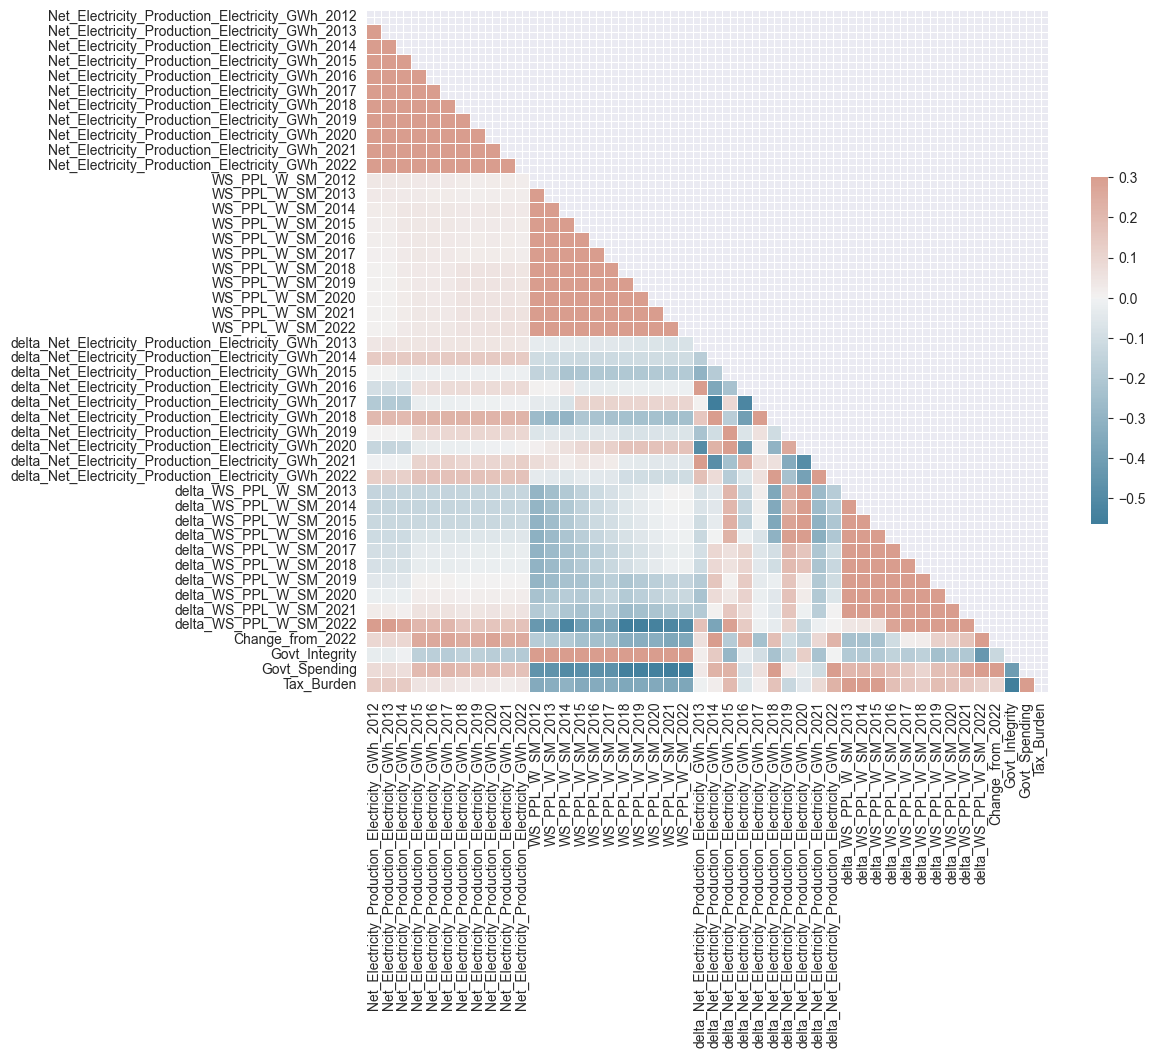

In [59]:
import re
interesting_cols = [c for c in final_df.columns if re.match(r".+_20[1,2][0-9]", c)] + ["Govt_Integrity", "Govt_Spending", "Tax_Burden"]
corr = final_df[interesting_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(ARTIFACT_DIR / "feature_corr.png")
plt.show()